 active_mask: array([0., 0., 0., 0., 0., 0.])
        cost: 27376.724653515514
         fun: array([0.9901551 , 0.96453544, 0.93933507, ..., 0.68893929, 0.70980369,
       0.73108736])
        grad: array([ -679.10479345, -1376.98603974, -1527.93442788,    34.11994871,
        -792.29690386, -1048.16087705])
         jac: array([[ -9.        ,  -6.        ,  -1.        ,   3.        ,
          1.        ,  -1.        ],
       [ -8.04706371,  -5.67346936,  -1.        ,   2.8367347 ,
          1.        ,  -1.        ],
       [ -7.14743857,  -5.34693877,  -1.        ,   2.67346939,
          1.        ,  -1.        ],
       ...,
       [-21.84131622, -65.42857122, -49.        ,  -4.67346954,
         -7.00000015,  -1.        ],
       [-23.39400291, -67.71428585, -49.        ,  -4.83673477,
         -7.00000015,  -1.        ],
       [-25.        , -70.        , -49.        ,  -5.        ,
         -7.00000015,  -1.        ]])
     message: 'The maximum number of function evaluations

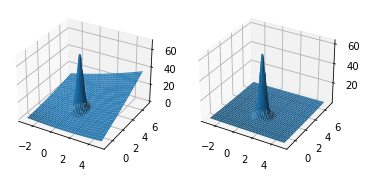

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.optimize import least_squares

def peak( x,y, a, x0, y0, s):
    """
    Just a symmetric peak for testing
    """
    return a * np.exp( -( (x - x0 )**2 + ( y - y0 )**2 ) / 2 / s**2 )

def second_order( xx, yy, aa, bb, cc, dd, ee, ff ):
    """
    Assuming that the base can be approximated by a second order equation
    generalization to higher orders should be straight forward
    """
    out = aa * xx**2 + 2 * bb * xx * yy + cc * yy**2 + dd * xx + ee * yy + ff
    return out


def residual_function( params, xa, ya, za, extracost, slope ):
    """
    cost function. Calculates difference from zero-plane
    with ultra high cost for negative values.
    previous solutions to similar problems have shown that sometimes 
    the optimization process has to be iterated with increasing 
    parameter slope ( and maybe extracost )
    """
    aa, bb, cc, dd, ee, ff = params
    ###subtract such that values become as small as possible
    ###
    diffarray = za - second_order( xa, ya, aa, bb, cc, dd, ee, ff )
    diffarray = diffarray.flatten( )
    ### BUT high costs for negative values
    cost = np.fromiter( (  -extracost * ( np.tanh( slope * x ) - 1 ) / 2.0 for x in diffarray ), float)
    return np.abs( cost ) + np.abs( diffarray )


### some test data
xl = np.linspace( -3, 5, 50 )
yl = np.linspace( -1, 7, 60 )

XX, YY = np.meshgrid( xl, yl )
 

VV = second_order( XX, YY, 0.1, 0.2, 0.08, 0.28, 1.9, 1.3 ) 
VV = VV + peak( XX, YY, 65, 1, 2, 0.3 )
# ~VV = VV + peak( XX, YY, 55, 3, 4, 0.5 )
# ~VV = VV + peak( XX, YY, 55, -1, 0, 0.4 )
# ~VV = VV + peak( XX, YY, 55, -3, 6, 0.7 )

### the optimization
result = least_squares(residual_function,  x0=( 0.0, 0.0, 0.00, 0.0, 0.0, 0 ), args=( XX, YY, VV, 1e4, 50 ) )
print(result)
print(result.x)
subtractme = second_order( XX, YY, *(result.x) ) 
nobase = VV - subtractme

### plotting
fig = plt.figure()
ax = fig.add_subplot( 1, 2, 1, projection='3d' )
ax.plot_surface( XX, YY, VV)
bx = fig.add_subplot( 1, 2, 2, projection='3d' )
bx.plot_surface( XX, YY, nobase)
plt.show()

In [16]:
type(YY)

numpy.ndarray

In [5]:
second_order( XX, YY, 0.1, 0.2, 0.08, 0.28, 1.9, 1.3 ) 

array([[ 0.74      ,  0.62511454,  0.51556018, ...,  1.10331529,
         1.23899209,  1.38      ],
       [ 0.81469118,  0.70866078,  0.6079615 , ...,  1.59419464,
         1.7387265 ,  1.88858949],
       [ 0.89232404,  0.79514872,  0.7033045 , ...,  2.08801567,
         2.24140261,  2.40012065],
       ...,
       [ 9.69232404, 10.08217743, 10.47736192, ..., 33.77836503,
        34.41878068, 35.06452743],
       [ 9.93469118, 10.33339963, 10.73743919, ..., 34.43692034,
        35.08619105, 35.74079288],
       [10.18      , 10.58756352, 11.00045814, ..., 35.09841733,
        35.75654311, 36.42      ]])

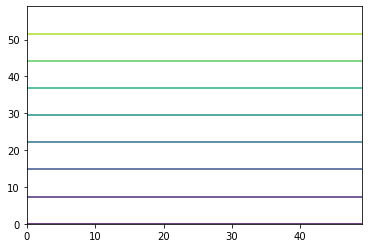

In [12]:
plt.contour(YY)
plt.show()